In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

**X Data analysis**

In [ ]:
data = pd.read_csv("path to the csv file",
                encoding='cp1252', low_memory=False)

In [ ]:
#remove duplicate
data=data.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
data.rename(columns={'Hit Sentence' :'tweet'},inplace=True)

In [ ]:
data.columns

Index(['Date', 'Headline', 'URL', 'Opening Text', 'tweet', 'Source',
       'Influencer', 'Country', 'Subregion', 'Language', 'Reach',
       'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo',
       'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership',
       'Engagement', 'AVE', 'Sentiment', 'Key Phrases', 'Input Name',
       'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id',
       'Twitter Client', 'Twitter Screen Name', 'User Profile Url',
       'Twitter Bio', 'Twitter Followers', 'Twitter Following',
       'Alternate Date Format', 'Time', 'State', 'City', 'Social Echo Total',
       'Editorial Echo', 'Views', 'Estimated Views', 'Likes', 'Replies',
       'Retweets', 'Comments', 'Shares', 'Reactions', 'Threads', 'Is Verified',
       'Parent URL', 'Document Tags', 'Document ID'],
      dtype='object')

In [ ]:
data.shape

(19664, 51)

In [ ]:
data.head()

In [ ]:
 #remove tweets with phone numbers
data=data.copy()
k=[]
for i in range(data.shape[0]):
    if re.findall("\d{10}|\d{9}", data.loc[i, 'tweet'])!=[]:
        k.append(re.findall("\d{10}|\d{9}", data.loc[i, 'tweet'])[0])
for j in k:
    data=data[~data['tweet'].str.contains(j)].reset_index().drop('index', axis=1)

In [ ]:
data.tweet = data.apply(lambda row: re.sub(r"http\S+", "", row.tweet).lower(), 1) #remove links inside the tweets
data.tweet = data.apply(lambda row: re.sub(r"\\n", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets
data.tweet= data.apply(lambda row: re.sub(r"\\r", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets
data.tweet = data.apply(lambda row: re.sub(r"\\t", ",", row.tweet).lower(), 1) #remove tabulation inside the tweets

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(str(text))
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(preprocess_text)

In [ ]:
#Find out most used hashtag
hashtags = data.tweet.str.extractall('(#\w+)')


hashtags[0].value_counts()[:30]

0
#malemaforsapresident           374
#votemk2024                     184
#rescuesa                       144
#effmustrise                    136
#voteda                         102
#2024isour1994                  102
#phalaphalafarmgate              97
#cr17bankstatements              86
#efffreestatemanifestolaunch     73
#unsecuritycouncil               62
#freecongo                       52
#voteeff2024                     46
#thegathering24                  38
#zuma                            37
#malema                          35
#votemk                          32
#humanrightsmonth2024            31
#trackingthabobester             31
#anc                             27
#pirates                         27
#sabcnews                        27
#humanrightsconferencesa         26
#votemk_29may2024                26
#earthquake                      22
#denelarmsdeal                   20
#papaghost                       20
#tintswalo                       20
#kleptocracy              

In [ ]:
#TOP MENTIONS
mentions = data.tweet.str.extractall('(@\w+)')
mentions[0].value_counts()[:20]

0
@mdnnewss           1818
@stats_feed         1192
@effsouthafrica     1096
@areafada1           951
@julius_s_malema     817
@nyebe_official      746
@gentlements         613
@constitution_94     529
@goolammv            440
@miz_ruraltarain     431
@moyaprof            426
@patricia_bantom     385
@news24              376
@newslivesa          376
@thisiscolbert       344
@naledichirwa        342
@jsteenhuisen        333
@mzwanelemanyi       322
@amukelanimoyani     301
@our_da              277
Name: count, dtype: int64

In [ ]:
#Top 10 Languages of Tweets
data['Language'].value_counts()[:10]

Language
English                  19483
Maori                       27
Portuguese                  25
Afrikaans                   21
Indonesian                  19
Malay (macrolanguage)       10
Turkish                      9
Waray (Philippines)          8
Cebuano                      7
Spanish                      6
Name: count, dtype: int64

In [ ]:
#sources(accounts) that recived more than 1000k retweets
source=data['source'].value_counts().loc[lambda x: x>100]

In [ ]:
#we have 196 accounts that recived the most number of retweets
source.shape

In [ ]:
#top 10 accounts
source.head(10)

In [ ]:
pd.options.display.max_colwidth = 200
data['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')[:20]

In [ ]:
data_retweets=data[data['tweet'].str.startswith('rt')].reset_index().drop('index', axis=1)# retweets dataset
import re

# Extract retweeted accounts
data_retweets['retweeted'] = data_retweets['tweet'].apply(lambda x: re.findall('rt @([_a-zA-Z-0123456789]+)', x))

# Remove retweet symbol "rt" and the account name inside the tweets of retweets dataset
data_retweets['tweet'] = data_retweets['tweet'].apply(lambda row: re.sub(r"rt @\S+", "", row).lower())

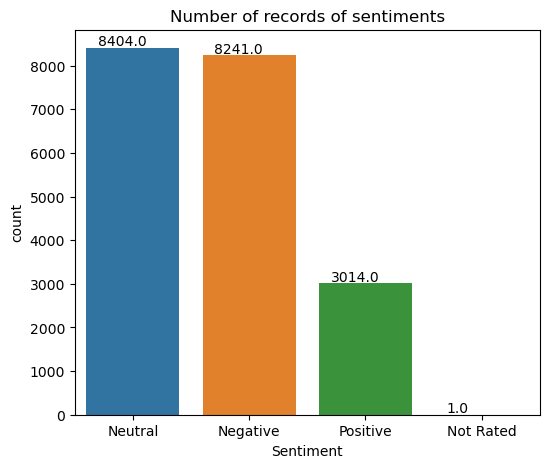

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
plt.title("Number of records of sentiments")
plot = sns.countplot(x = 'Sentiment', data=data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))

In [ ]:
#filter by language
#data_retweets['Language'].value_counts().plot.pie()
data=data[data['Language'].str.contains("English")].reset_index().drop('index', axis=1)
data_retweets=data_retweets[data_retweets['Language'].str.contains("English")].reset_index().drop('index', axis=1)

In [ ]:
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

In [ ]:
#Checking for Days with highest tweet activity
import altair as alt
data_Ls=data.pivot_table(values=['Count'], index='Alternate Date Format', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
alt.Chart(data_Ls).mark_bar().encode(x='Alternate Date Format:N', y=alt.Y('Count', sort='-x'), color='Alternate Date Format', tooltip=['Alternate Date Format']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2527158134.py:3: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Alternate Date Format', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Check tweet samples on days with highest number of tweets
daily = data[data['Alternate Date Format'].str.contains('Mar 16, 2024|Mar 17, 2024')]

In [ ]:
daily.shape

In [ ]:
#percentage of all tweets tweeted within Mar 17 and 16, 2024
(daily.shape[0]/data.shape[0]) * 100

In [ ]:
#Most Shared Message/Information within Mar 17 and 16
# Check if the 'Count' column exists in the DataFrame
if 'Count' not in data.columns:
    # If not, create the 'Count' column by counting the number of occurrences of each tweet
    data['Count'] = data['tweet'].map(data['tweet'].value_counts())

# Create the pivot table
data_Ls = data.pivot_table(values=['Count'], index='tweet', aggfunc='sum').reset_index().sort_values('Count', ascending=False).head(15)

# Create the bar chart
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('tweet:N', sort='-x'), color='tweet', tooltip=['tweet']).interactive()

C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
data_retweets.shape

In [ ]:
#Check tweets days with highest number of retweets
rt_mask = data_retweets[data_retweets['Alternate Date Format'].str.contains('Mar 2, 2024|Oct 13, 2024')]

In [ ]:
rt_mask.shape

In [ ]:
#Percentage of retweets made between Oct 12 and 13, 2021
(rt_mask.shape[0]/data_retweets.shape[0]) *100

In [ ]:
#Most Retweeted tweets between highest rt days
data_Ls=rt_mask.pivot_table(values=['Count'], index='tweets', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('tweets:N', sort='-x'), color='tweets', tooltip=['tweets']).interactive()

In [ ]:
#Most Retweeted accounts
data_Ls=rt_mask.pivot_table(values=['Count'], index='retweeted', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('retweeted:N', sort='-x'), color='retweeted', tooltip=['retweeted']).interactive()

In [ ]:
#get profile information and save as Dataframe with the following details
Profile=pd.DataFrame()
j=0
for i in L:
    test = api.lookup_users(screen_names=[i])
    users = api.get_user(i)
    #\test.screen_name
    #test.name
    #test.description
    #test.statuses_count
    for user in test:
        Profile.loc[j, "Name"]=user.screen_name
        Profile.loc[j, "Description"]=user.description
        Profile.loc[j, "Creation"]=users.created_at.strftime("%m/%d/%Y, %H:%M:%S")
        Profile.loc[j, "Followings"]=user.friends_count
        Profile.loc[j, "Followers"]=user.followers_count
    j=j+1

In [ ]:
Profile

**Facebook data analysis**

In [ ]:
data = pd.read_csv("path to the csv file",
                encoding='cp1252', low_memory=False)#encoding is optional, it can be removed or changed depends on the data type

In [ ]:
#Remove duplicates
data=data.drop_duplicates().reset_index().drop('index', axis=1)

In [ ]:
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

In [ ]:
data.columns

Index(['Page Name', 'User Name', 'Facebook Id', 'Page Category',
       'Page Admin Top Country', 'Page Description', 'Page Created',
       'Likes at Posting', 'Followers at Posting', 'Post Created',
       'Post Created Date', 'Post Created Time', 'Type', 'Total Interactions',
       'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 'Angry',
       'Care', 'Video Share Status', 'Is Video Owner?', 'Post Views',
       'Total Views', 'Total Views For All Crossposts', 'Video Length', 'URL',
       'Message', 'Link', 'Final Link', 'Image Text', 'Link Text',
       'Description', 'Sponsor Id', 'Sponsor Name', 'Sponsor Category',
       'Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )',
       'Overperforming Score', 'Count'],
      dtype='object')

In [ ]:
data.dropna(axis=1)

In [ ]:
#Remove links
data['Message'] = data['Message'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
## WordCloud of Facebook Posts
stop_words = get_stop_words('english')# if posts are in french otherwise use STOPWORDS
#from stop_words import safe_get_stop_words
#stop_words = safe_get_stop_words('unsupported language')
text = ' '.join([str(x) for x in data['Message'].values if pd.notnull(x)])
wc = WordCloud(stopwords=stop_words,background_color='white',max_words=200,scale=3).generate(text)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)
plt.show()
#stop_words = get_stop_words('french') + get_stop_words('english')

In [ ]:
#Checking for Days with highest post activity
data_Ls=data.pivot_table(values=['Count'], index='Post Created Date', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
alt.Chart(data_Ls).mark_bar().encode(x='Post Created Date:N', y=alt.Y('Count', sort='-x'), color='Post Created Date', tooltip=['Post Created Date']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\263972244.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Post Created Date', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(30)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
#Create total interactions variable
for i in range(data.shape[0]):
    data.loc[i,'interactions']=data.loc[i,'Likes']+data.loc[i,'Comments']+data.loc[i,'Shares']+data.loc[i,'Love']+data.loc[i,'Wow']+data.loc[i,'Haha']+data.loc[i,'Sad']+data.loc[i,'Angry']+data.loc[i,'Care']

In [ ]:
# Top 15 posts with high number of Total Interactions
data_Ls=data.pivot_table(values=['interactions'], index='Message', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='interactions', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2470508865.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['interactions'], index='Message', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

In [ ]:
# Top 15 posts with high number of Total Interactions and reshares
#This accounts for posts that are direct shares with no added caption or message
data_Ls=data.pivot_table(values=['interactions'], index='Description', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='interactions', y=alt.Y('Description:N', sort='-x'), color='Description', tooltip=['Description']).interactive()


C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2627385099.py:3: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['interactions'], index='Description', aggfunc=np.sum).reset_index().sort_values('interactions', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Most Commented messages
data_Ls=data.pivot_table(values=['Comments'], index='Message', aggfunc=np.sum).reset_index().sort_values('Comments', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Comments', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2070090382.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Comments'], index='Message', aggfunc=np.sum).reset_index().sort_values('Comments', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

In [ ]:
#Most Liked Message
data_Ls=data.pivot_table(values=['Likes'], index='Message', aggfunc=np.sum).reset_index().sort_values('Likes', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Likes', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\1305261736.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Likes'], index='Message', aggfunc=np.sum).reset_index().sort_values('Likes', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Messages having received high number of Angry
data_Ls=data.pivot_table(values=['Angry'], index='Message', aggfunc=np.sum).reset_index().sort_values('Angry', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Angry', y=alt.Y('Message:N', sort='-x'), color='Message', tooltip=['Message']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\4218032146.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Angry'], index='Message', aggfunc=np.sum).reset_index().sort_values('Angry', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
## print table with Message and their links
table=pd.DataFrame()
for i in range(15):
    table.loc[i, 'Message']=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    k=data_Ls.reset_index().drop('index', axis=1).loc[i, 'Message']
    l=data[data['Message']==k]['URL'].tolist()
    table.loc[i, 'Link']=l[0]# you can take every number in range(len(l)) incase an url doesn't open
table

In [ ]:
# Top 15 Page Admin Top Country
data_Ls=data.pivot_table(values=['Count'], index='Page Admin Top Country', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Admin Top Country:N', sort='-x'), color='Page Admin Top Country', tooltip=['Page Admin Top Country']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2079502159.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Page Admin Top Country', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Most Active Pages about the topic and in the considered period we r looking for
data_Ls=data.pivot_table(values=['Count'], index='Page Name', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Page Name:N', sort='-x'), color='Page Name', tooltip=['Page Name']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\2677995958.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Page Name', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# Top 15 Most Active Page links about the topic and in the considered period we r looking for
data_Ls=data.pivot_table(values=['Count'], index='Link', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
alt.Chart(data_Ls).mark_bar().encode(x='Count', y=alt.Y('Link:N', sort='-x'), color='Link', tooltip=['Link']).interactive()

C:\Users\Heineken\AppData\Local\Temp\ipykernel_10928\4265378987.py:2: FutureWarning: The provided callable <function sum at 0x000001FEFDE2CCC0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_Ls=data.pivot_table(values=['Count'], index='Link', aggfunc=np.sum).reset_index().sort_values('Count', ascending=False).head(15)
C:\Users\Heineken\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

**Text Similarity**

In [ ]:
text_column = "Message"  # posts
posts = data[text_column]

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r"[^a-zA-Z0-9 ]", "", text)  # Remove non-alphanumeric characters
  words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
  return " ".join(words)

posts = posts.apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
features = vectorizer.fit_transform(posts)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(features)

In [ ]:
# Feature Engineering (Text Representation)
vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
features = vectorizer.fit_transform(posts)

# Text Similarity Calculation
similarity_matrix = cosine_similarity(features)

# Identify Similar Content
similarity_threshold = 0.7  # Adjust threshold as needed
similar_posts = []

for i in range(1, len(posts)):
  if similarity_matrix[0][i] >= similarity_threshold:
    similar_posts.append((data.loc[i, "Page Name"], data.loc[i, text_column]))

# Create DataFrame to display results
data_dict = {
    "Account": [account for account, _ in similar_posts],
    "Similar Post Content": [content for _, content in similar_posts]
}

similar_posts_df = pd.DataFrame(data_dict)

# Display DataFrame
similar_posts_df

,Account,Similar Post Content
0,Istituto della Cultura Italiana di Vienna,LA FURBIZIA DEGLI ANIMALI L'Anthoscopus è uccello che ha sviluppato una tecnica difensiva della prole unica nel suo genere. Per fare ciò ha creato un nido con un ingresso segreto e nascosto. Il fa...
1,Italiani a Vienna-VIP,LA FURBIZIA DEGLI ANIMALI L'Anthoscopus è uccello che ha sviluppato una tecnica difensiva della prole unica nel suo genere. Per fare ciò ha creato un nido con un ingresso segreto e nascosto. Il fa...
